## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [323]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
# %matplotlib inline

In [324]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [325]:
# 把兩個訓練資料集和測試資料集讀進來
training_data=pd.read_csv('Titanic_train.csv')
testing_data=pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [326]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
'''
暗示，可以用那些函數，來看出資料的欄位變數
'''
print('Training data')
print(training_data.info())
print(training_data.describe())
print('Testing data')
print(testing_data.info())
print(testing_data.describe())
print('Tesing 資料集中沒有Survived欄位')

Training data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [327]:
#可以嘗試用範例的程式
print(training_data.isnull().any())
print('可看出在Age, Cabin及Embarked欄位有遺失值')
print('遺失值欄位數目：',training_data.isnull().any().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
可看出在Age, Cabin及Embarked欄位有遺失值
遺失值欄位數目： 3


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [328]:
#合併資料
concat_data=pd.concat([training_data,testing_data])
print(concat_data.info())
print(concat_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061

Cabin有遺失的死亡率比較高


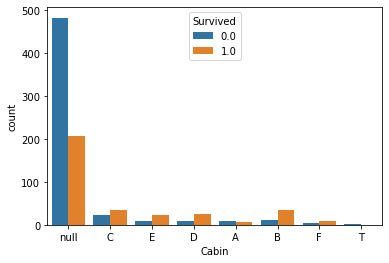

In [329]:
# 以 concat_data 為例，先看 Cabin  出現值的特性
Cabin=[]
# print(training_data['Cabin'])
for cell in concat_data['Cabin']:
    if type(cell)==type(float(0)):
        Cabin.append('null')
        continue
    if cell[0]=='A':
        Cabin.append('A')
    elif cell[0]=='B':
        Cabin.append('B')
    elif cell[0]=='C':
        Cabin.append('C')
    elif cell[0]=='D':
        Cabin.append('D')
    elif cell[0]=='E':
        Cabin.append('E')
    elif cell[0]=='F':
        Cabin.append('F')
    elif cell[0]=='T':
        Cabin.append('T')
    else:
        Cabin.append('null')
dummy_data=concat_data.copy()
concat_data['Cabin']=Cabin
ax=sns.countplot(x='Cabin',data=concat_data,hue='Survived')
print('Cabin有遺失的死亡率比較高')


Text(0.5, 1.0, 'replace by median')

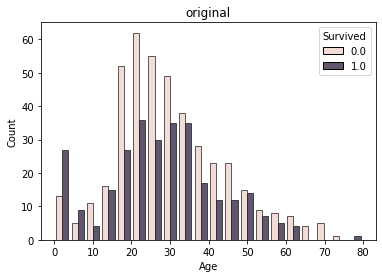

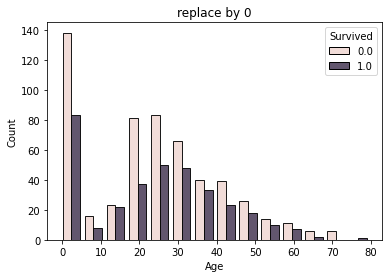

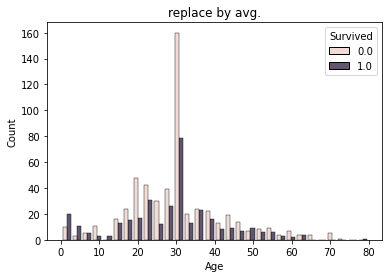

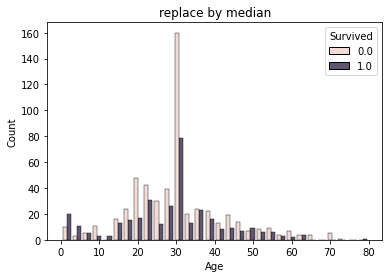

In [330]:
plt.figure()
ax=sns.histplot(data=concat_data,x='Age',hue='Survived',multiple="dodge",shrink=.8)
ax.set_title('original')

plt.figure()
concat_data['Age']=concat_data['Age'].fillna(0)
ax=sns.histplot(data=concat_data,x='Age',hue='Survived',multiple="dodge",shrink=.8)
ax.set_title('replace by 0')

concat_data=dummy_data
plt.figure()
concat_data['Age']=concat_data['Age'].fillna(concat_data['Age'].mean())
ax=sns.histplot(data=concat_data,x='Age',hue='Survived',multiple="dodge",shrink=.8)
ax.set_title('replace by avg.')


concat_data=dummy_data
plt.figure()
concat_data['Age']=concat_data['Age'].fillna(concat_data['Age'].median())
ax=sns.histplot(data=concat_data,x='Age',hue='Survived',multiple="dodge",shrink=.8)
ax.set_title('replace by median')